# 10-armed Testbed

In [1]:
import numpy as np
from tqdm import trange
import matplotlib.pyplot as plt

from src.bandit import Bandit

In [2]:
def simulate(runs=2000, times=1000, bandits=3):
    """
    For any learning method, we can measure its performance and behavior as it improves with experience over 1000 time steps 
    when applied to 1 of the bandit problems. This makes up 1 run. Repeating this for 2000 independent runs, each with a different 
    bandit problem, we obtained measures of the learning algorithm’s average behavior.
    :param runs: Number of runs
    :param times: Number of times
    :param bandits: Bandit problems
    :return: Optimal action count mean and reward mean
    """
    
    rewards = np.zeros((len(bandits), runs, times))
    optimal_action_counts = np.zeros(rewards.shape)

    for i, bandit in enumerate(bandits):
        for run in trange(runs):
            bandit.initialize()
            for time in range(times):
                action = bandit.act()
                rewards[i, run, time] = bandit.step(action)
                if action == bandit.optimal_action:
                    optimal_action_counts[i, run, time] = 1

    return optimal_action_counts.mean(axis=1), rewards.mean(axis=1)

## 1. Reward Distribution

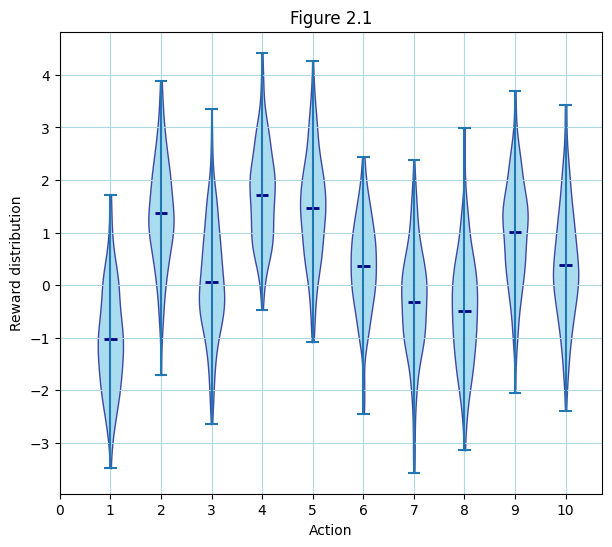

In [3]:
base_noise = np.random.randn(10)
dataset = np.random.randn(200, 10) + base_noise

fig, ax = plt.subplots(figsize=(7, 6), dpi=100)

parts = ax.violinplot(dataset, showmeans=True)

for pc in parts['bodies']:
    pc.set_facecolor('skyblue')  
    pc.set_edgecolor('navy')    
    pc.set_alpha(0.7)            

parts['cmeans'].set_color('navy')
parts['cmeans'].set_linewidth(2)

ax.set_title("Figure 2.1")
ax.set_xlabel("Action")
ax.set_ylabel("Reward distribution")
plt.xticks(range(11))
plt.grid(c='lightblue')

plt.savefig("../images/figure_2_1.png", dpi=600, bbox_inches='tight')
plt.show()

## 2. Greedy Action Selection VS ε-greedy Action Selection

In [4]:
epsilons = [0, 0.1, 0.01]
bandits = [Bandit(epsilon=epsilon, use_sample_averages=True) for epsilon in epsilons]

In [5]:
runs = 2000
times = 1000
optimal_action_counts, rewards = simulate(runs, times, bandits)

100%|██████████| 2000/2000 [01:56<00:00, 17.21it/s]


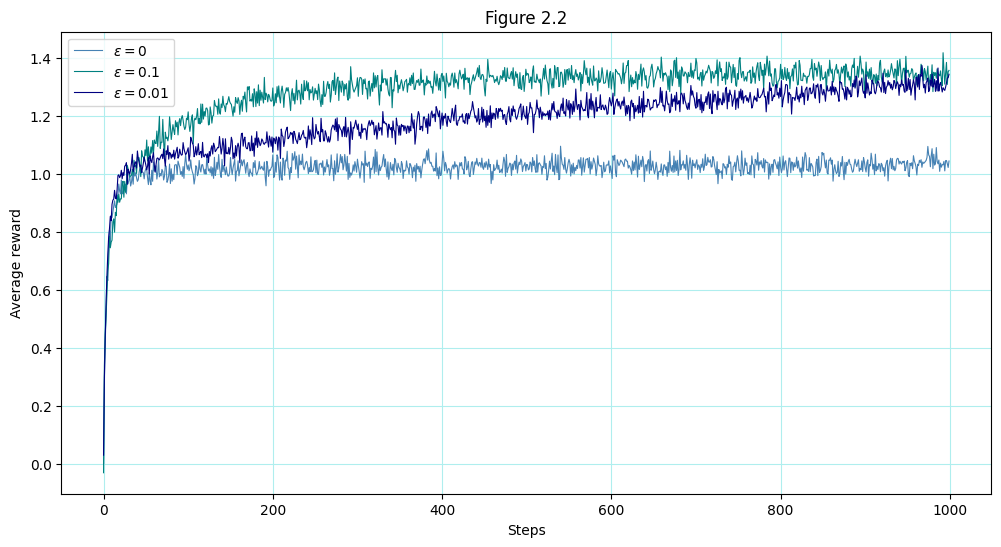

In [6]:
colors = ['steelblue', 'teal', 'navy']
labels = ["$\\epsilon = 0$", "$\\epsilon = 0.1$", "$\\epsilon = 0.01$"]

plt.figure(figsize=(12, 6), dpi=100)

for idx, (reward, epsilon) in enumerate(zip(rewards, epsilons)):
    plt.plot(reward, label=labels[idx], color=colors[idx], linewidth=0.8)

plt.title("Figure 2.2")
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.legend()
plt.grid(c='paleturquoise')

plt.savefig("../images/figure_2_2_reward.png", dpi=300, bbox_inches='tight')
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
C:\Users\User\AppData\Local\Temp\ipykernel_29392\1304477620.py:4: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(counts, color=colors[idx], label="$\epsilon = %.02f$" % epsilon, linewidth=0.8)


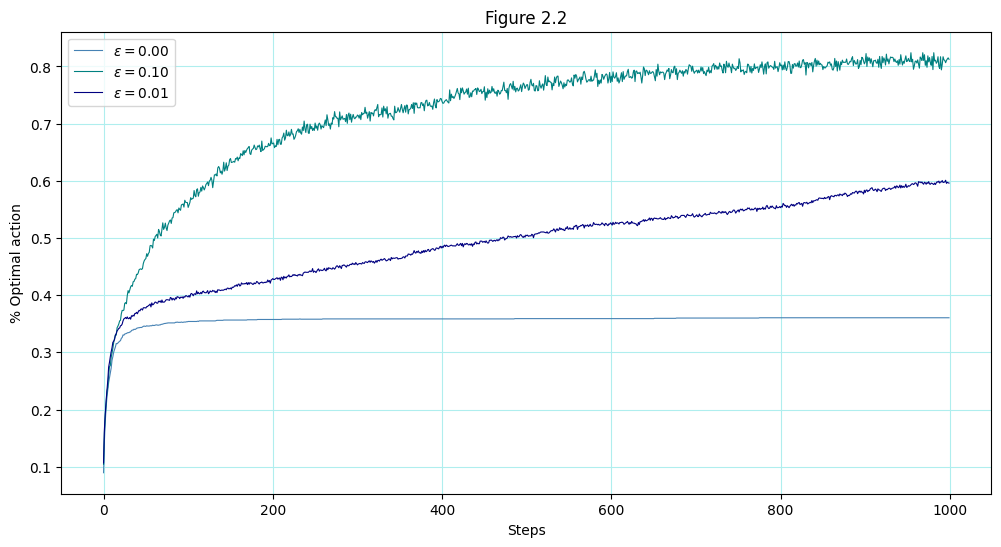

In [7]:
plt.figure(figsize=(12, 6), dpi=100)

for idx, (epsilon, counts) in enumerate(zip(epsilons, optimal_action_counts)):
    plt.plot(counts, color=colors[idx], label="$\epsilon = %.02f$" % epsilon, linewidth=0.8)

plt.xlabel("Steps")
plt.ylabel("% Optimal action")
plt.grid(c='paleturquoise')

plt.title("Figure 2.2")
plt.legend()
plt.savefig("../images/figure_2_2_action.png", dpi=300, bbox_inches='tight')
plt.show()

## 3. Optimistic Initial Values VS Realistic Initial Values

In [8]:
bandits = [Bandit(epsilon=0, initial_action_value_estimates=5, step_size=0.1), 
           Bandit(epsilon=0.1, initial_action_value_estimates=0, step_size=0.1)]

In [9]:
runs = 2000
times = 1000
optimal_action_counts_with_estimates, _ = simulate(runs, times, bandits)

100%|██████████| 2000/2000 [01:43<00:00, 19.40it/s]


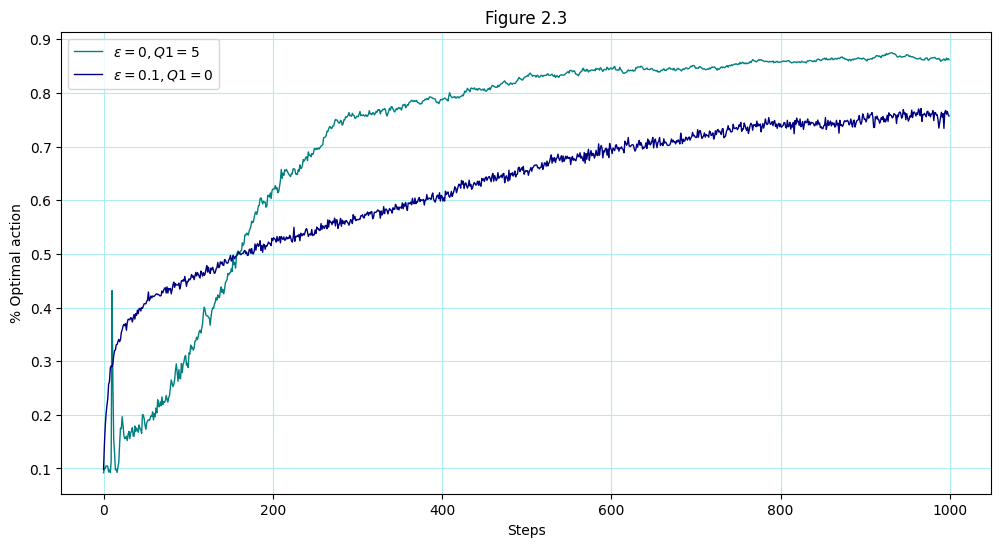

In [10]:
labels_withQ = ["$\\epsilon = 0, Q1 = 5$", "$\\epsilon = 0.1, Q1 = 0$"]
colors = ['teal', 'navy']

plt.figure(figsize=(12, 6), dpi=100)

for idx, count in enumerate(optimal_action_counts_with_estimates):
    plt.plot(count, label=labels_withQ[idx], color=colors[idx], linewidth=1)
plt.title("Figure 2.3")
plt.xlabel("Steps")
plt.ylabel("% Optimal action")
plt.grid(c='paleturquoise')
plt.legend()

plt.savefig('../images/figure_2_3.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Upper-Confidence-Bound (UCB) Action Selection

In [11]:
bandits = [
    Bandit(epsilon=0, confidence_level=2, use_sample_averages=True),
    Bandit(epsilon=0.1, use_sample_averages=True)
]

In [13]:
runs = 2000
times = 1000
_, average_rewards = simulate(runs, times, bandits)

100%|██████████| 2000/2000 [04:39<00:00,  7.14it/s]


<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
C:\Users\User\AppData\Local\Temp\ipykernel_29392\2712654288.py:4: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(average_rewards[1], label="epsilon-greedy $\epsilon = 0.1$", color='navy', linewidth=0.8)


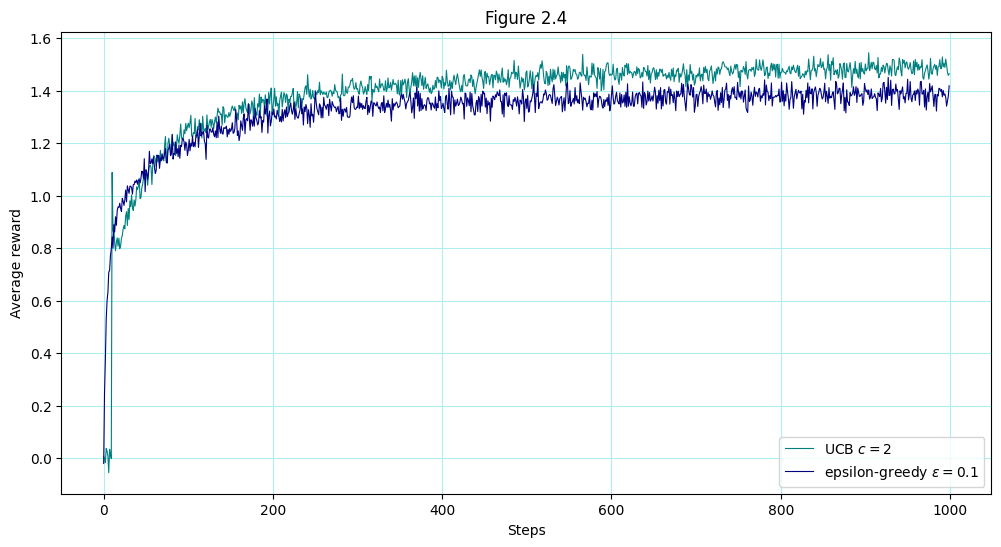

In [14]:
plt.figure(figsize=(12, 6), dpi=100)

plt.plot(average_rewards[0], label="UCB $c = 2$", color='teal', linewidth=0.8)
plt.plot(average_rewards[1], label="epsilon-greedy $\epsilon = 0.1$", color='navy', linewidth=0.8)

plt.title("Figure 2.4")
plt.xlabel("Steps")
plt.ylabel("Average reward")

plt.legend()
plt.grid(c='paleturquoise')

plt.savefig("../images/figure_2_4.png", dpi=300, bbox_inches='tight')
plt.show()

## 5. Gradient Bandit Algorithms (GBA)

In [15]:
bandits = [Bandit(use_gradient=True, step_size=0.1, use_gradient_baseline=True, true_expected_reward=4),
           Bandit(use_gradient=True, step_size=0.1, use_gradient_baseline=False, true_expected_reward=4),
           Bandit(use_gradient=True, step_size=0.4, use_gradient_baseline=True, true_expected_reward=4),
           Bandit(use_gradient=True, step_size=0.4, use_gradient_baseline=False, true_expected_reward=4)]

In [16]:
runs = 2000
times = 1000
optimal_action_counts, _ = simulate(runs, times, bandits)

100%|██████████| 2000/2000 [01:28<00:00, 22.50it/s]


In [17]:
labels = [r"$\alpha = 0.1$, with baseline", r"$\alpha = 0.1$, without baseline",
          r"$\alpha = 0.4$, with baseline", r"$\alpha = 0.4$, without baseline"]

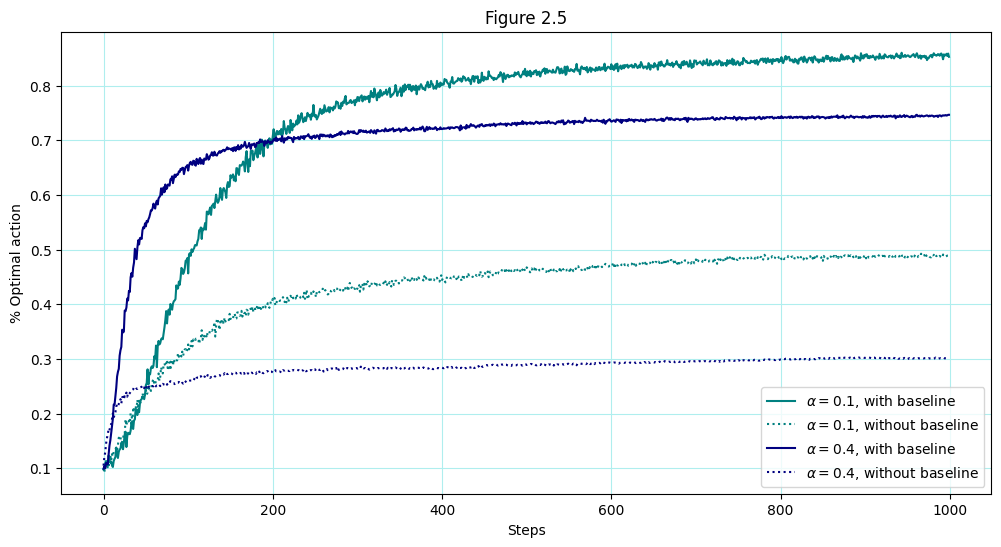

In [18]:
plt.figure(figsize=(12, 6), dpi=100)

plt.plot(optimal_action_counts[0], label=labels[0], color='teal')
plt.plot(optimal_action_counts[1], label=labels[1], color='teal', linestyle=':')
plt.plot(optimal_action_counts[2], label=labels[2], color='navy')
plt.plot(optimal_action_counts[3], label=labels[3], color='navy', linestyle=':')

plt.title("Figure 2.5")
plt.xlabel("Steps")
plt.ylabel("% Optimal action")

plt.legend(loc='lower right')
plt.grid(c='paleturquoise')

plt.savefig("../images/figure_2_5.png", dpi=300, bbox_inches='tight')
plt.show()

## 6. Comparison

In [19]:
labels = ["ε-greedy", "GBA", "UCB", r"Greedy with optimistic initialization $\alpha = 0.1$"]

In [20]:
generators = [lambda epsilon: Bandit(epsilon=epsilon, use_sample_averages=True),
              lambda alpha: Bandit(use_gradient=True, step_size=alpha, use_gradient_baseline=True),
              lambda confidence_level: Bandit(epsilon=0, confidence_level=confidence_level, use_sample_averages=True),
              lambda initial_action_value_estimates: Bandit(epsilon=0, initial_action_value_estimates=initial_action_value_estimates, step_size=0.1)]

In [21]:
parameters = [np.arange(-7, -1, dtype=np.float64),
              np.arange(-5, 2, dtype=np.float64),
              np.arange(-4, 3, dtype=np.float64),
              np.arange(-2, 3, dtype=np.float64)]

In [22]:
bandits = []
for generator, parameter in zip(generators, parameters):
    for param in parameter:
        bandits.append(generator(pow(2, param)))

In [23]:
len(bandits)

25

In [24]:
_, average_rewards = simulate(runs, times, bandits)
rewards = np.mean(average_rewards, axis=1)

100%|██████████| 2000/2000 [00:44<00:00, 44.70it/s]


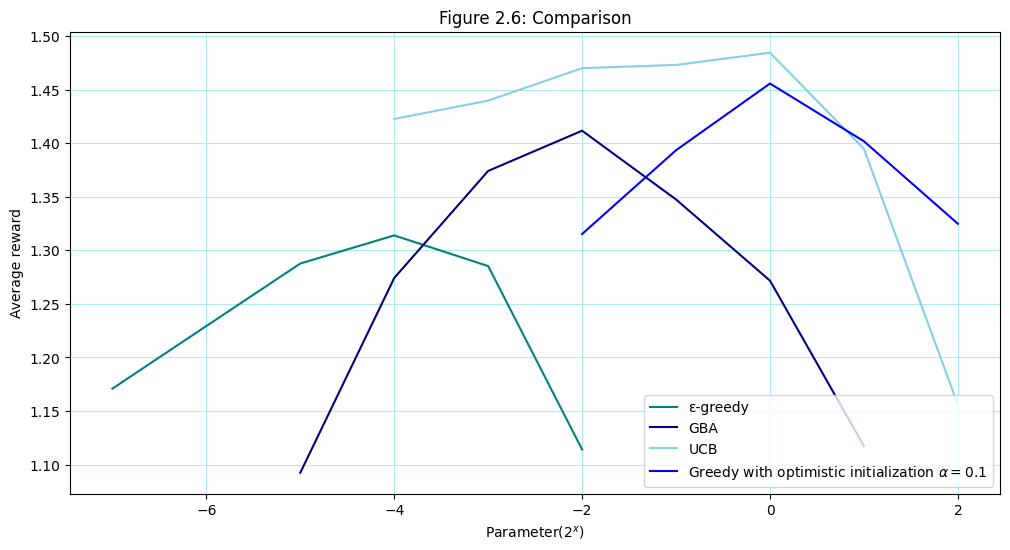

In [28]:
plt.figure(figsize=(12, 6), dpi=100)
colors = ['teal', 'navy', 'skyblue', 'blue']
i = 0
for label, parameter, color in zip(labels, parameters, colors):
    l = len(parameter)
    plt.plot(parameter, rewards[i:i+l], label=label, color=color)
    i += l
plt.title("Figure 2.6: Comparison")
plt.xlabel("Parameter($2^x$)")
plt.ylabel("Average reward")
plt.legend(loc='lower right')
plt.grid(c='paleturquoise')

plt.savefig("../images/figure_2_6.png", dpi=300, bbox_inches='tight')
plt.show()